In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # To display all columns
import xlrd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns
sns.set_style("whitegrid")

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt


## Reading in Data and Cleaning Data

In [2]:
df = pd.read_excel('Data/drug_consumption.xls')

We delete every row where a participant indicated the use of 'Semeron', which is a fictional, non existing drug, used to pick out individuals who are exaggerating their drug use:

In [3]:
df1 = df.drop(df.loc[df["Semer"] != "CL0"].index)

Reassigning "real" values for Gender, Country & Education, for better visualizations

In [4]:
Gencat = df1['Gender'].apply(lambda x: 1 if x > 0 else 0)
df1["Gender"] = Gencat
df1["Gender"] = df1["Gender"].astype("category")

In [5]:
Countrycat = df1['Country'].apply(lambda x: {(-0.09765):'Australia', 
                                             0.24923:'Canada',
                                             0.96082:'UK',
                                            (-0.46841):'New Zealand',
                                            (-0.28519):'Other',
                                            (0.21128):'R.o.Ireland',
                                            (-0.57009):'USA'}.get(x,''))
df1.insert(5, "Country_Name", Countrycat)
df1["Country_Name"] = df1["Country_Name"].astype("category")

In [6]:
Educat = df1['Education'].apply(lambda x: {(-2.43591): "under 16y",
                                           (-1.73790): "16y",
                                           (-1.43719): "17y",
                                           (-1.22751): '18y',
                                           (-0.61113):'College/Uni',
                                           (-0.05921):'Cert./Diploma',
                                           (0.45468): 'Uni Degree', 
                                           (1.16365):'Master',
                                           (1.98437): 'PhD'}.get(x,''))
df1.insert(4, "Education_Level", Educat)
df1["Education_Level"] = df1["Education_Level"].astype("category")

In [7]:
Ethinicitycat = df1["Ethnicity"].apply(lambda x: {(-0.50212): "Asian",
                                           (-1.10702): "Black",
                                           (1.90725): "Mixed-Black/Asian",
                                           (0.12600): 'Mixed-White/Asian',
                                           (-0.22166):'Mixed-White/Black',
                                           (0.11440):'Other',
                                           (-0.31685): 'White'}.get(x,''))
df1.insert(8, "Ethnicity_Label", Ethinicitycat)
df1["Ethnicity_Label"] = df1["Ethnicity_Label"].astype("category")

In [8]:
Agecat = df1["Age"].apply(lambda x: {(-0.95197): "18-24",
                                           (-0.07854): "25-34",
                                           (0.49788): "35-44",
                                           (1.09449): '45-54',
                                           (1.82213):'55-64',
                                           (2.59171):'65+'}.get(x,''))
df1.insert(2, "Age_Cat", Agecat)
df1["Age_Cat"] = df1["Age_Cat"].astype("category")

## Getting an overview of the Data

### Overview of who particpated in this study

In [9]:
custom_palette_gender = ["navy", "indianred"]

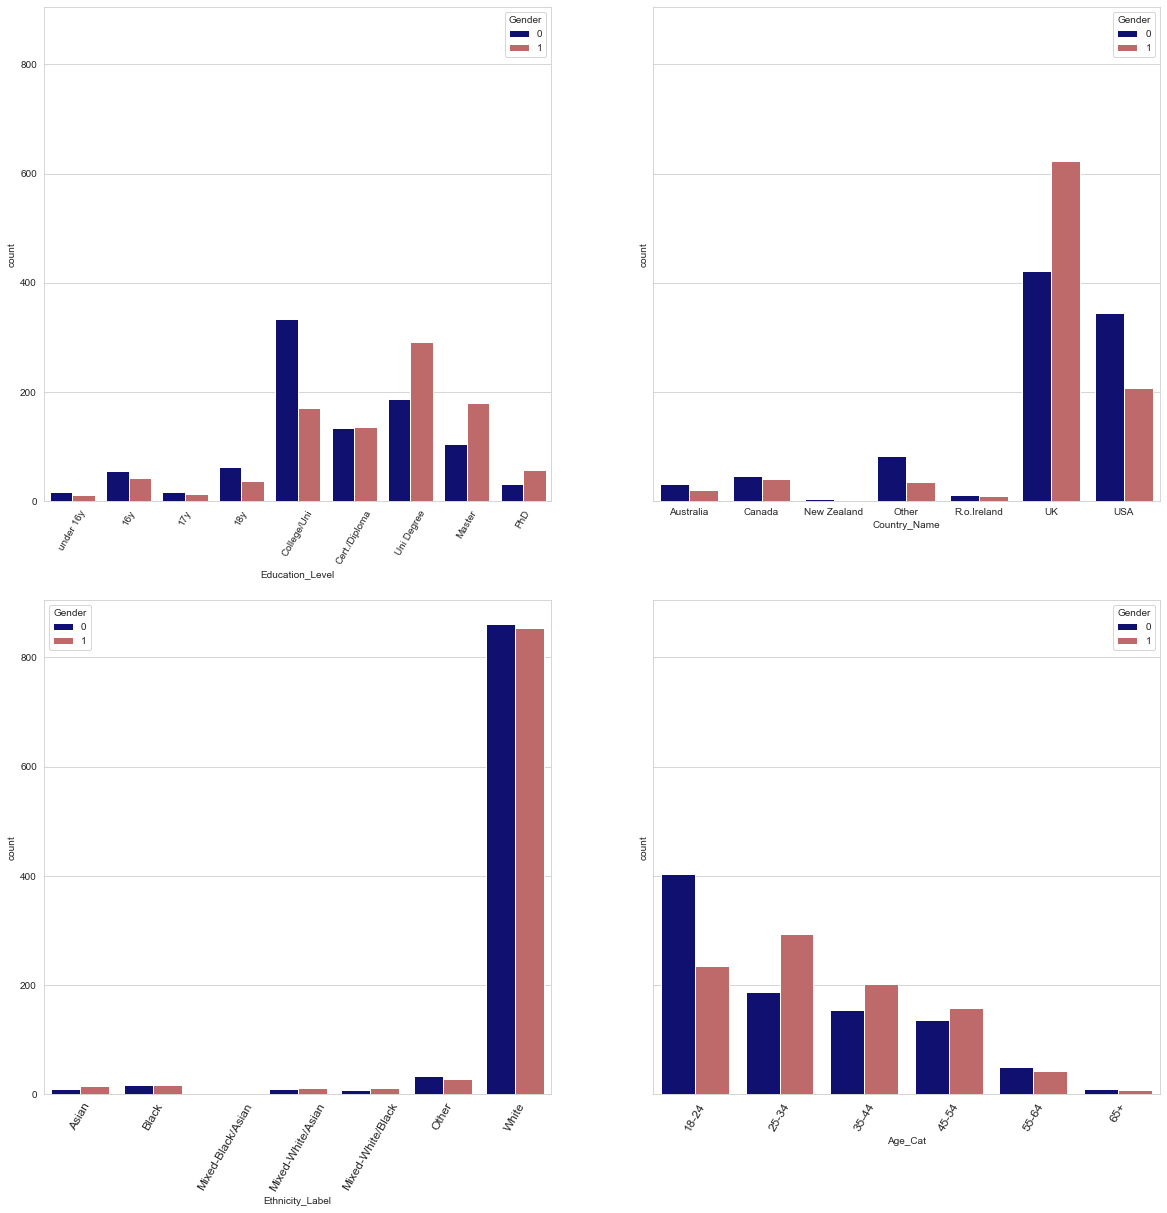

In [10]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(20, 20), sharey=True)

sns.set_palette(custom_palette_gender)

edu_order = ["under 16y", "16y", "17y", '18y', 'College/Uni', 'Cert./Diploma', 'Uni Degree', 'Master', 'PhD']
ethnicity_order = ["Asian", "Black", "Mixed-Black/Asian", "Mixed-White/Asian", "Mixed-White/Black", "Other", "White"]
age_order = ["18-24", "25-34", "35-44", '45-54', "55-64",'65+']

g = sns.countplot(data=df1, x="Education_Level", order = edu_order, hue='Gender', ax=axes[0][0])
g.set_xticklabels(edu_order, rotation=60)

g1 = sns.countplot(data=df1, x="Country_Name", hue='Gender', ax=axes[0][1])
plt.xticks(rotation=60, size = 12);

g2 = sns.countplot(data=df1, x="Ethnicity_Label", hue='Gender', ax=axes[1][0])
g2.set_xticklabels(ethnicity_order, rotation=60, size = 12);

g3 = sns.countplot(data=df1, x="Age_Cat", hue='Gender', ax=axes[1][1])
g3.set_xticklabels(age_order, rotation=60, size = 12);

### Overview of drug usage

<AxesSubplot:xlabel='VSA', ylabel='count'>

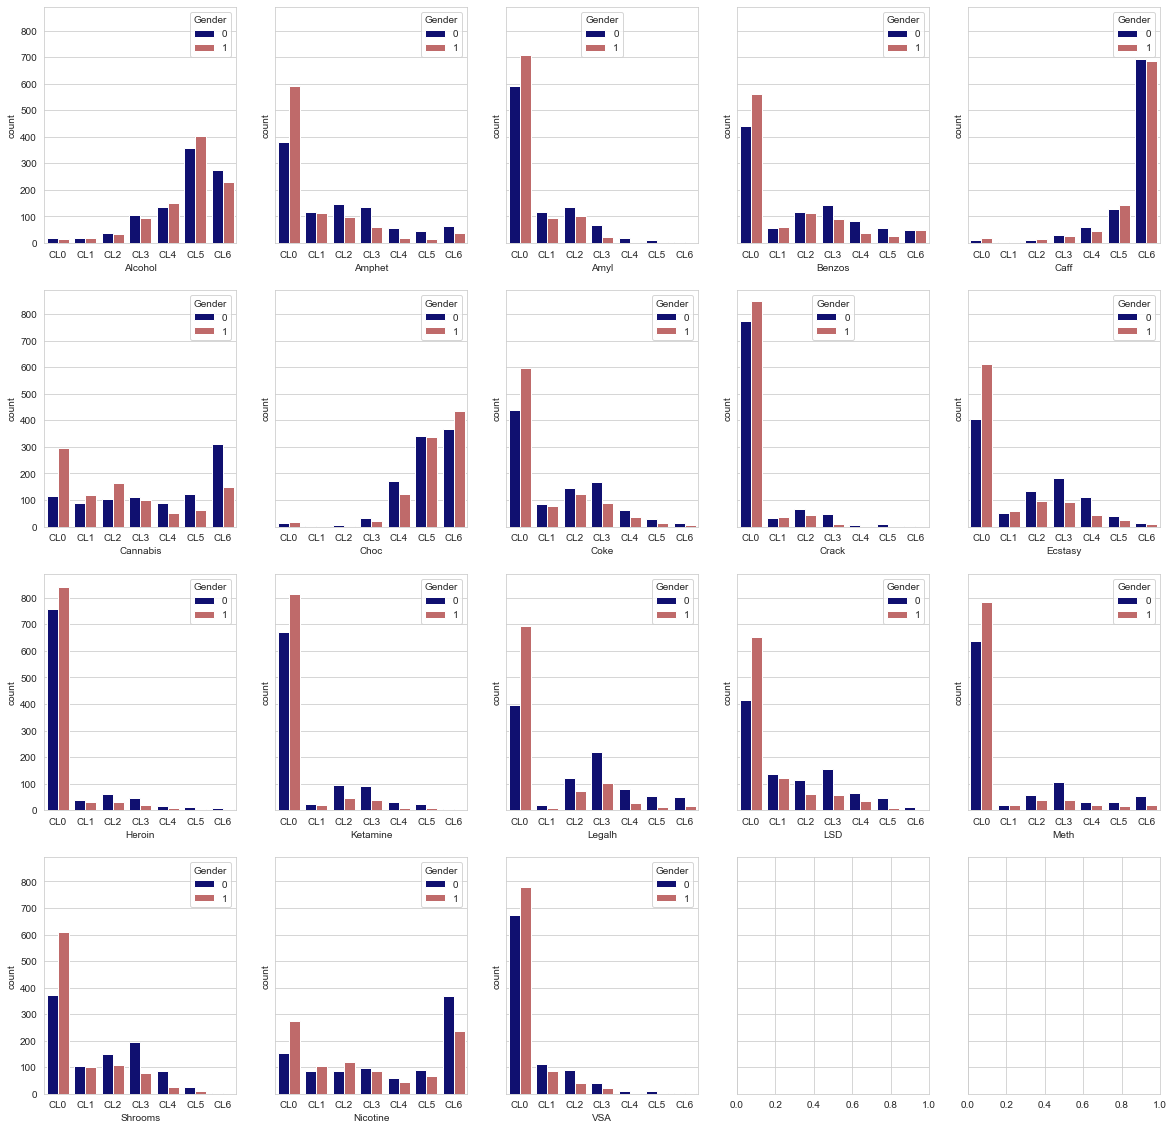

In [11]:
clsorder = ["CL0", "CL1", "CL2", "CL3", "CL4", "CL5", "CL6"]

f, axes = plt.subplots(4, 5, figsize=(20, 20), sharey=True)

sns.set_palette(custom_palette_gender)

sns.countplot(data=df1, x="Alcohol", order = clsorder, hue='Gender', ax=axes[0, 0])
sns.countplot(data=df1, x="Amphet", order = clsorder, hue='Gender', ax=axes[0, 1])
sns.countplot(data=df1, x="Amyl", order = clsorder, hue='Gender', ax=axes[0, 2])
sns.countplot(data=df1, x="Benzos", order = clsorder, hue='Gender', ax=axes[0, 3])
sns.countplot(data=df1, x="Caff", order = clsorder, hue='Gender', ax=axes[0, 4])
sns.countplot(data=df1, x="Cannabis", order = clsorder, hue='Gender', ax=axes[1, 0])
sns.countplot(data=df1, x="Choc", order = clsorder, hue='Gender', ax=axes[1, 1])
sns.countplot(data=df1, x="Coke", order = clsorder, hue='Gender', ax=axes[1, 2])
sns.countplot(data=df1, x="Crack", order = clsorder, hue='Gender', ax=axes[1, 3])
sns.countplot(data=df1, x="Ecstasy", order = clsorder, hue='Gender', ax=axes[1, 4])
sns.countplot(data=df1, x="Heroin", order = clsorder, hue='Gender', ax=axes[2, 0])
sns.countplot(data=df1, x="Ketamine", order = clsorder, hue='Gender', ax=axes[2, 1])
sns.countplot(data=df1, x="Legalh", order = clsorder, hue='Gender', ax=axes[2, 2])
sns.countplot(data=df1, x="LSD", order = clsorder, hue='Gender', ax=axes[2, 3])
sns.countplot(data=df1, x="Meth", order = clsorder, hue='Gender', ax=axes[2, 4])
sns.countplot(data=df1, x="Shrooms", order = clsorder, hue='Gender', ax=axes[3, 0])
sns.countplot(data=df1, x="Nicotine", order = clsorder, hue='Gender', ax=axes[3, 1])
sns.countplot(data=df1, x="VSA", order = clsorder, hue='Gender', ax=axes[3, 2])

There are only 3 people who never consumed alcohol and chocolate and just 1 person never consumed any drugs at all:

In [12]:
df1[(df1["Alcohol"] == "CL0") & (df1["Choc"] == "CL0")]

,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
330,333,1.82213,55-64,1,-1.22751,18y,0.24923,Canada,-0.31685,White,-0.46725,-0.43999,-1.55521,0.94156,0.75830,-1.37983,-1.54858,CL0,CL0,CL0,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL5,CL0,CL0
1277,1281,-0.95197,18-24,0,0.45468,Uni Degree,0.96082,UK,-0.50212,Asian,0.82562,0.63779,-0.84732,-2.21844,0.93949,1.86203,1.92173,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
1743,1747,0.49788,35-44,1,1.16365,Master,0.96082,UK,-1.10702,Black,-0.24649,-0.57545,-0.58331,0.13136,0.12331,-0.21712,-1.18084,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0


### Overview of personality traits 

In [13]:
df1.head()

,ID,Age,Age_Cat,Gender,Education,Education_Level,Country,Country_Name,Ethnicity,Ethnicity_Label,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,35-44,1,-0.05921,Cert./Diploma,0.96082,UK,0.12600,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,25-34,0,1.98437,PhD,0.96082,UK,-0.31685,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,35-44,0,-0.05921,Cert./Diploma,0.96082,UK,-0.31685,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,18-24,1,1.16365,Master,0.96082,UK,-0.31685,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,35-44,1,1.98437,PhD,0.96082,UK,-0.31685,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


<AxesSubplot:xlabel='SS', ylabel='Count'>

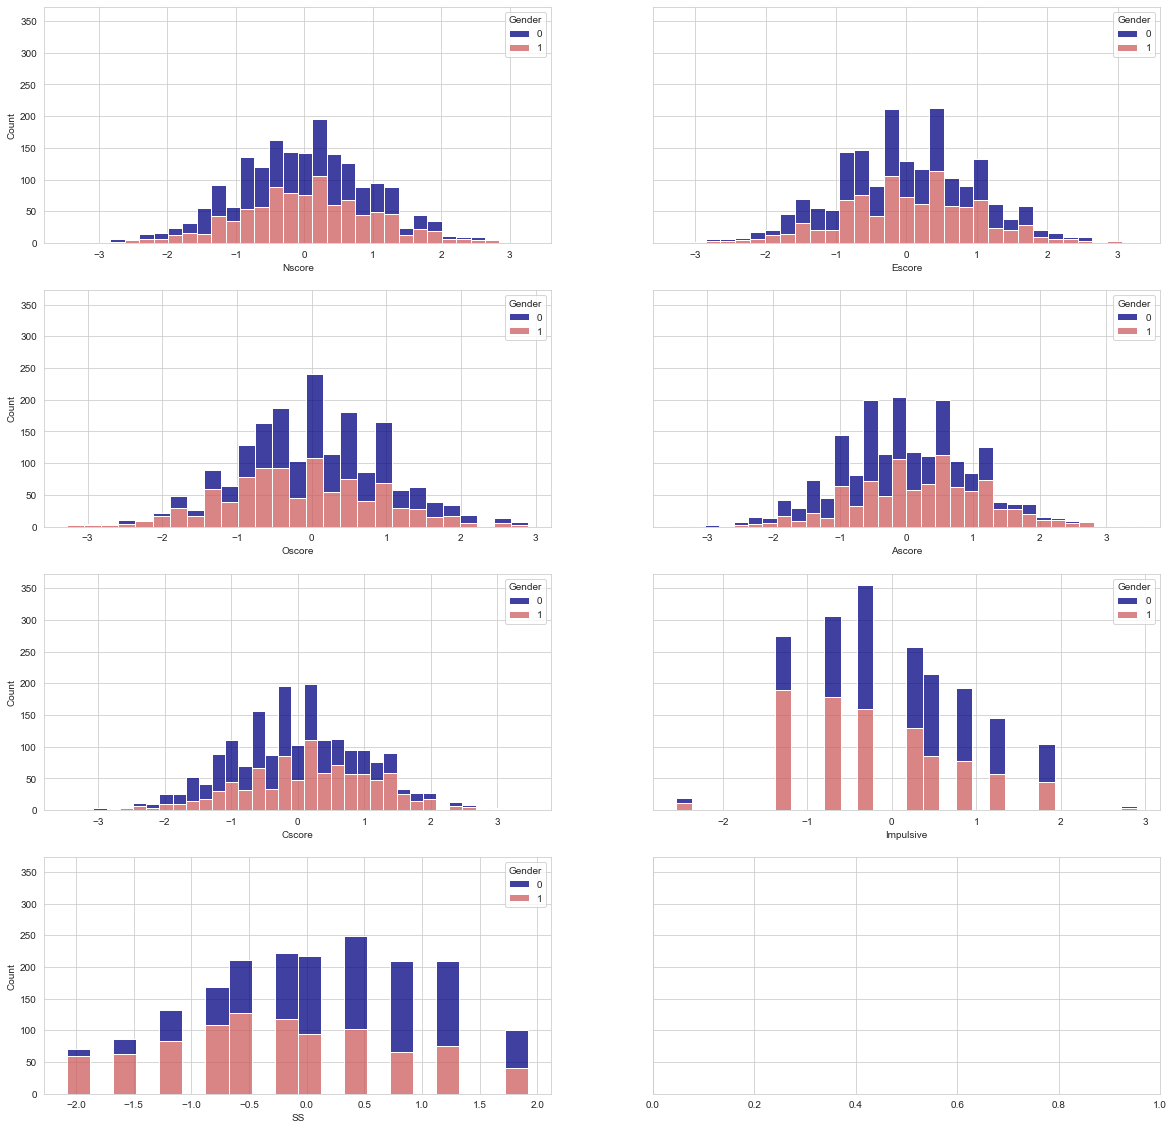

In [15]:
fig, axes = plt.subplots(ncols=2, nrows=4, figsize=(20, 20), sharey=True)
sns.set_palette(custom_palette_gender)

sns.histplot(data=df1, x="Nscore", hue='Gender', multiple="stack", ax=axes[0][0])
sns.histplot(data=df1, x="Escore", hue='Gender', multiple="stack", ax=axes[0][1])
sns.histplot(data=df1, x="Oscore", hue='Gender', multiple="stack", ax=axes[1][0])
sns.histplot(data=df1, x="Ascore", hue='Gender', multiple="stack", ax=axes[1][1])
sns.histplot(data=df1, x="Cscore", hue='Gender', multiple="stack", ax=axes[2][0])
sns.histplot(data=df1, x="Impulsive", hue='Gender', multiple="stack", ax=axes[2][1])
sns.histplot(data=df1, x="SS", hue='Gender', multiple="stack", ax=axes[3][0])